# 이미지 분류

In [107]:
# TensorFlow와 tf.keras 라이브러리를 임포트합니다. TensorFlow는 오픈 소스 머신러닝 라이브러리로, 다양한 머신러닝 모델을 구축하고 학습시키는 데 사용됩니다. tf.keras는 TensorFlow의 고수준 API로, 신경망을 쉽게 구성할 수 있게 해줍니다.
import tensorflow as tf

# numpy는 배열과 행렬 연산에 특화된 라이브러리입니다. 머신러닝에서 데이터 처리와 변환에 널리 사용됩니다.
# matplotlib.pyplot은 데이터를 시각화하기 위한 라이브러리로, 그래프와 차트를 그리는 데 사용됩니다.
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow 버전을 출력합니다. 라이브러리의 버전을 확인함으로써 호환성 문제를 사전에 파악할 수 있습니다.
print(tf.__version__)

2.17.0-dev20240306


In [108]:
# TensorFlow에서 제공하는 fashion MNIST 데이터셋을 불러오기 위한 준비 과정입니다. fashion MNIST는 10가지 카테고리의 70,000개의 그레이스케일 이미지로 구성된 데이터셋으로, 의류 이미지 분류에 널리 사용됩니다.
fashion_mnist = tf.keras.datasets.fashion_mnist

# load_data() 메소드를 호출하여 fashion MNIST 데이터셋을 불러옵니다. 이 메소드는 데이터셋을 학습용 데이터(이미지와 레이블)와 테스트용 데이터(이미지와 레이블)로 나누어 반환합니다.
# train_images와 train_labels는 모델 학습에 사용될 이미지와 해당 이미지의 레이블입니다.
# test_images와 test_labels는 학습된 모델을 평가하기 위한 테스트 이미지와 레이블입니다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [109]:
# fashion MNIST 데이터셋에 포함된 이미지들이 나타내는 10가지 의류 아이템의 이름을 정의한 배열입니다.
# 각 클래스 이름은 데이터셋의 레이블 인덱스에 따라 순서대로 매치됩니다.
# 이 배열을 사용함으로써, 숫자 레이블을 실제 의류 아이템의 이름으로 쉽게 변환할 수 있습니다.
class_names = ['T-shirt/top',    # 0번 레이블
               'Trouser',        # 1번 레이블
               'Pullover',       # 2번 레이블
               'Dress',          # 3번 레이블
               'Coat',           # 4번 레이블
               'Sandal',         # 5번 레이블
               'Shirt',          # 6번 레이블
               'Sneaker',        # 7번 레이블
               'Bag',            # 8번 레이블
               'Ankle boot']     # 9번 레이블

In [110]:
# 학습 이미지 데이터셋의 구조를 출력합니다. 이는 (이미지 수, 이미지 높이, 이미지 너비)의 형태로, 
# fashion MNIST 데이터셋의 경우 각 이미지는 28x28 픽셀의 그레이스케일 이미지입니다. 
# 따라서 train_images.shape는 (60000, 28, 28)과 같은 형태를 가지며, 이는 60,000개의 28x28 픽셀 이미지가 있다는 것을 의미합니다.
print(train_images.shape)

# 학습 데이터셋에 포함된 레이블의 총 개수를 출력합니다. 이는 학습용 이미지의 총 개수와 일치해야 합니다.
# fashion MNIST 데이터셋의 경우, 60,000개의 학습 이미지에 대응하는 60,000개의 레이블이 있습니다.
print(len(train_labels))

# 테스트 이미지 데이터셋의 구조를 출력합니다. 이 역시 (이미지 수, 이미지 높이, 이미지 너비)의 형태로, 
# fashion MNIST 데이터셋의 테스트 세트에는 10,000개의 28x28 픽셀 이미지가 포함되어 있습니다.
# 따라서 test_images.shape는 (10000, 28, 28)과 같은 형태를 가지며, 이는 10,000개의 28x28 픽셀 이미지가 있다는 것을 의미합니다.
print(test_images.shape)

# 테스트 데이터셋에 포함된 레이블의 총 개수를 출력합니다. 이는 테스트용 이미지의 총 개수와 일치해야 합니다.
# fashion MNIST 데이터셋의 경우, 10,000개의 테스트 이미지에 대응하는 10,000개의 레이블이 있습니다.
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


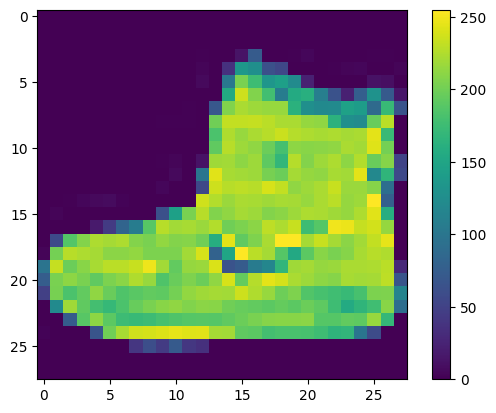

In [111]:
# matplotlib의 figure 객체를 생성합니다. 이 객체는 그래프나 차트를 그리는 데 사용되는 도화지와 같은 역할을 합니다.
plt.figure()

# train_images 배열의 첫 번째 이미지를 화면에 표시합니다. 
# imshow 함수는 2D 배열(이 경우 28x28 픽셀의 이미지)을 입력으로 받아 그래픽으로 표시합니다.
plt.imshow(train_images[0])

# 컬러바를 추가합니다. 컬러바는 이미지의 픽셀 값에 따른 색상을 나타내는 바로, 이미지의 데이터 범위를 시각적으로 이해하는 데 도움을 줍니다.
plt.colorbar()

# 그리드를 비활성화합니다. 기본적으로 imshow 함수는 이미지 위에 격자(grid)를 표시하지만, 여기서는 이를 불투명하게 처리하여 이미지만 보이도록 합니다.
plt.grid(False)

# 모든 설정을 마친 후, plt.show() 함수를 호출하여 위에서 정의한 그래픽을 화면에 표시합니다. 이 때, figure에 추가된 이미지와 컬러바가 함께 나타납니다.
plt.show()


In [112]:
# 학습용 이미지 데이터셋의 모든 픽셀 값을 255로 나누어 정규화합니다.
# 이 과정을 통해 데이터의 범위가 0과 1 사이의 값으로 조정되어, 모델이 데이터를 더 쉽게 처리할 수 있게 됩니다.
train_images = train_images / 255.0

# 테스트용 이미지 데이터셋에 대해서도 동일한 정규화 과정을 수행합니다.
# 학습 데이터셋과 테스트 데이터셋을 같은 방식으로 처리하는 것은 모델의 일관된 성능 평가를 위해 중요합니다.
test_images = test_images / 255.0

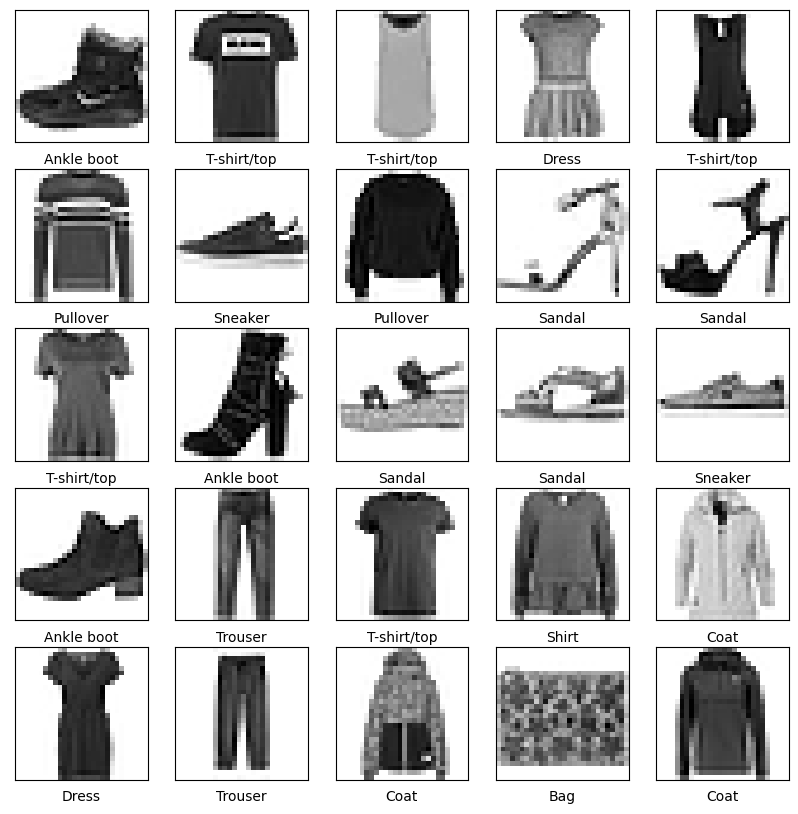

In [113]:
# 10x10 크기의 그림을 생성합니다. 이것은 이미지를 표시할 캔버스의 크기입니다.
plt.figure(figsize=(10,10))

# 25개의 이미지를 표시하기 위한 반복문입니다.
for i in range(25):
    # 5x5 격자에 i번째 이미지를 표시합니다. subplot의 인덱스는 1부터 시작합니다.
    plt.subplot(5,5,i+1)
    # x축의 눈금을 표시하지 않습니다.
    plt.xticks([])
    # y축의 눈금을 표시하지 않습니다.
    plt.yticks([])
    # 격자(grid)를 표시하지 않습니다.
    plt.grid(False)
    # train_images 배열에서 i번째 이미지를 흑백(cmap=plt.cm.binary)으로 표시합니다.
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 이미지 아래에 class_names 배열을 사용하여 train_labels[i]에 해당하는 라벨의 이름을 표시합니다.
    plt.xlabel(class_names[train_labels[i]])
# plt.show()를 호출하여 위에서 정의한 그림을 화면에 표시합니다.
plt.show()


In [114]:
# TensorFlow의 Sequential 모델을 생성합니다. Sequential 모델은 레이어를 순서대로 쌓아가는 방식의 모델입니다.
model = tf.keras.Sequential([
    # Flatten 레이어는 입력 이미지를 1D 배열로 변환합니다. 여기서는 28x28 크기의 이미지를 784(28*28) 크기의 1D 배열로 변환합니다.
    # 이 레이어는 모델의 첫 번째 레이어로, input_shape를 통해 입력 형태를 지정해줍니다.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Dense 레이어는 완전 연결(fully-connected) 레이어로, 128개의 뉴런을 가지고 있으며, 활성화 함수로 'relu'를 사용합니다.
    tf.keras.layers.Dense(128, activation='relu'),
    # 마지막 Dense 레이어는 10개의 출력 뉴런을 가지고 있으며, 각 뉴런은 데이터가 10개의 클래스 중 하나에 속할 확률을 나타냅니다.
    # 여기서는 활성화 함수를 사용하지 않습니다. 이는 로짓(클래스 별 점수)을 반환하기 위함입니다.
    tf.keras.layers.Dense(10)
])

TensorFlow에서 모델을 학습시키기 위해서는 먼저 compile() 메소드를 호출하여 학습 과정에서 사용할 최적화 알고리즘(optimizer), 손실 함수(loss function), 그리고 평가 지표(metrics)를 설정해야 합니다. 다음은 이를 수정하기 위한 단계입니다:

최적화 알고리즘 선택: 모델을 컴파일하기 위해 사용할 최적화 알고리즘을 선택합니다. 대표적인 예로 adam, sgd, rmsprop 등이 있습니다.

손실 함수 설정: 문제 유형(회귀, 이진 분류, 다중 클래스 분류 등)에 따라 적절한 손실 함수를 선택합니다. 예를 들어, 이진 분류 문제의 경우 binary_crossentropy, 다중 클래스 분류 문제의 경우 categorical_crossentropy를 사용할 수 있습니다.

평가 지표 지정: 학습 과정에서 모델 성능을 평가하기 위한 지표를 선택합니다. 예를 들어, 분류 문제에서는 accuracy를 사용할 수 있습니다.

모델을 컴파일하는 코드는 대략 다음과 같습니다:

In [115]:
# 모델을 컴파일합니다. 이 과정에서 학습 과정을 구성합니다.
model.compile(
    # 최적화 함수로 'adam'을 사용합니다. Adam 최적화는 경사 하강법의 한 형태로, 학습률을 자동으로 조절해주는 알고리즘입니다.
    optimizer='adam',
    # 손실 함수로 'SparseCategoricalCrossentropy'를 사용합니다. 이 함수는 다중 클래스 분류 문제에서 사용되며,
    # from_logits=True는 모델의 출력이 로짓(softmax 함수를 적용하기 전의 출력)임을 나타냅니다.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # 학습과 평가 시 모델의 성능을 측정하기 위한 지표(metrics)로 'accuracy'를 사용합니다.
    metrics=['accuracy']
)

# 모델을 학습 데이터에 대해 학습합니다. 이 과정에서 모델은 주어진 epochs 수만큼 학습 데이터를 반복해서 학습합니다.
# train_images: 학습 이미지 데이터
# train_labels: 학습 데이터의 정답 라벨
# epochs=10: 모델을 10번의 epoch 동안 학습합니다. 한 epoch는 전체 데이터 셋에 대한 한 번의 학습 과정을 의미합니다.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7785 - loss: 0.6337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8605 - loss: 0.3883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.3135
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8918 - loss: 0.2934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8964 - loss: 0.2807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8994 - loss: 0.2702
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9103 - loss: 0.2414
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9109 - loss: 0.2354


In [116]:
# 모델을 테스트 데이터셋에 대해 평가합니다. 이 과정에서 모델의 손실(loss)과 정확도(accuracy)를 측정합니다.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# 테스트 데이터셋에 대한 모델의 정확도를 출력합니다.
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8834 - loss: 0.3350

Test accuracy: 0.883400022983551


In [117]:
# 기존 모델에 Softmax 레이어를 추가하여 새로운 Sequential 모델을 생성합니다.
# Softmax 레이어는 모델의 출력(로짓)을 확률로 변환해주는 역할을 합니다.
probability_model = tf.keras.Sequential([
    model, # 기존에 정의한 모델을 첫 번째 레이어로 추가합니다.
    tf.keras.layers.Softmax() # Softmax 레이어를 추가하여, 출력을 확률로 변환합니다.
])

In [118]:
# probability_model을 사용하여 테스트 이미지 데이터셋에 대한 예측을 수행합니다.
# 이 과정에서 각 테스트 이미지에 대해 모델은 각 클래스에 속할 확률을 출력합니다.
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [119]:
# predictions 배열의 첫 번째 요소를 출력합니다. 이는 첫 번째 테스트 이미지에 대한 모델의 예측 확률입니다.
predictions[0]

array([1.1563556e-06, 1.2064139e-09, 3.8901220e-08, 9.1738258e-08,
       1.0206334e-09, 3.6613124e-03, 6.8204952e-07, 1.7890353e-02,
       2.5953812e-08, 9.7844636e-01], dtype=float32)

In [120]:
# np.argmax 함수를 사용하여 첫 번째 예측에서 가장 높은 확률을 가진 클래스의 인덱스를 찾습니다.
# 이 값은 모델이 첫 번째 테스트 이미지가 속한다고 예측한 클래스입니다.
np.argmax(predictions[0])

9

In [121]:
# 첫 번째 테스트 이미지의 실제 라벨을 출력합니다.
# predicted_label과 비교하여 모델의 예측이 정확한지 확인할 수 있습니다.
test_labels[0]

9

In [122]:
def plot_image(i, predictions_array, true_label, img):
    # 해당 인덱스의 실제 라벨과 이미지를 가져옵니다.
    true_label, img = true_label[i], img[i]
    plt.grid(False) # 그리드를 표시하지 않습니다.
    plt.xticks([]) # x축 눈금을 표시하지 않습니다.
    plt.yticks([]) # y축 눈금을 표시하지 않습니다.

    # 이미지를 흑백으로 표시합니다.
    plt.imshow(img, cmap=plt.cm.binary)

    # 예측된 라벨을 구합니다.
    predicted_label = np.argmax(predictions_array)
    # 예측된 라벨이 실제 라벨과 같으면 파란색, 다르면 빨간색으로 표시합니다.
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # 예측 라벨, 확률, 실제 라벨을 이미지 아래에 표시합니다.
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i] # 해당 인덱스의 실제 라벨을 가져옵니다.
    plt.grid(False) # 그리드를 표시하지 않습니다.
    plt.xticks(range(10)) # x축에 0부터 9까지의 눈금을 표시합니다.
    plt.yticks([]) # y축 눈금을 표시하지 않습니다.
    thisplot = plt.bar(range(10), predictions_array, color="#777777") # 예측 확률을 바 차트로 표시합니다.
    plt.ylim([0, 1]) # y축의 범위를 0에서 1까지로 설정합니다.
    predicted_label = np.argmax(predictions_array) # 예측된 라벨을 구합니다.

    # 예측된 라벨과 실제 라벨의 바에 색을 다르게 표시합니다.
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

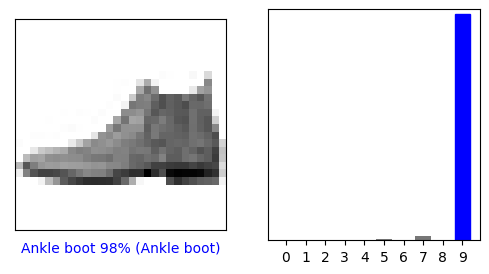

In [123]:
i = 0 # 분석할 이미지의 인덱스를 0으로 설정합니다.

# 그림의 크기를 설정합니다. 여기서는 가로 6인치, 세로 3인치로 설정합니다.
plt.figure(figsize=(6,3))

# 첫 번째 서브플롯을 생성합니다. 1행 2열의 첫 번째 위치에 이미지를 표시할 것입니다.
plt.subplot(1,2,1)
# 첫 번째 이미지와 해당하는 예측값, 실제 라벨, 이미지 데이터를 이용하여 이미지를 표시하는 함수를 호출합니다.
plot_image(i, predictions[i], test_labels, test_images)

# 두 번째 서브플롯을 생성합니다. 1행 2열의 두 번째 위치에 예측값 배열을 표시할 것입니다.
plt.subplot(1,2,2)
# 첫 번째 이미지의 예측값 배열과 실제 라벨을 이용하여 예측값 배열을 바 차트로 표시하는 함수를 호출합니다.
plot_value_array(i, predictions[i], test_labels)

# 설정한 서브플롯들을 화면에 표시합니다.
plt.show()

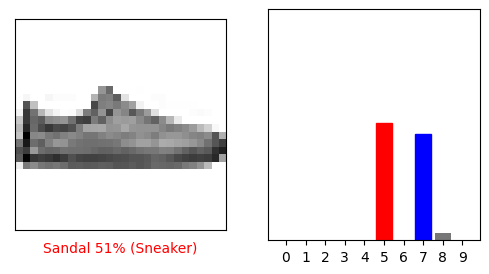

In [124]:
i = 12 # 분석할 이미지의 인덱스를 12로 설정합니다.

# 그림의 크기를 설정합니다. 여기서는 가로 6인치, 세로 3인치로 설정합니다.
plt.figure(figsize=(6,3))

# 첫 번째 서브플롯을 생성합니다. 1행 2열의 첫 번째 위치에 이미지를 표시할 것입니다.
plt.subplot(1,2,1)
# 12번째 이미지와 해당하는 예측값, 실제 라벨, 이미지 데이터를 이용하여 이미지를 표시하는 함수를 호출합니다.
plot_image(i, predictions[i], test_labels, test_images)

# 두 번째 서브플롯을 생성합니다. 1행 2열의 두 번째 위치에 예측값 배열을 표시할 것입니다.
plt.subplot(1,2,2)
# 12번째 이미지의 예측값 배열과 실제 라벨을 이용하여 예측값 배열을 바 차트로 표시하는 함수를 호출합니다.
plot_value_array(i, predictions[i], test_labels)

# 설정한 서브플롯들을 화면에 표시합니다.
plt.show()

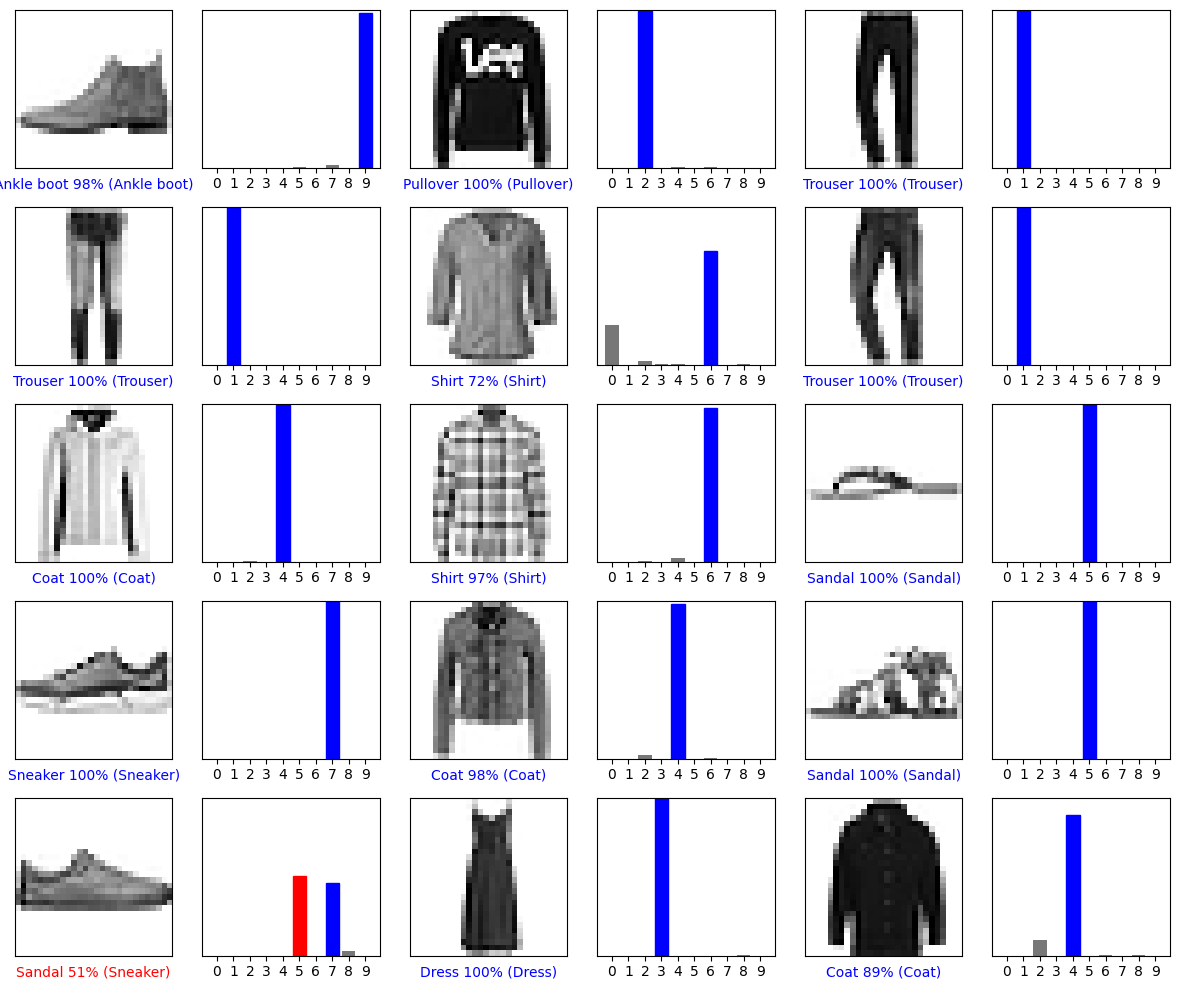

In [125]:
num_rows = 5 # 행의 수를 5로 설정합니다.
num_cols = 3 # 열의 수를 3으로 설정합니다.
num_images = num_rows * num_cols # 전체 이미지의 수는 행과 열의 곱으로 계산합니다.

# 그림의 크기를 설정합니다. 가로 길이는 이미지당 2인치로 설정하고, 세로 길이는 행의 수에 따라 자동으로 조절됩니다.
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# 반복문을 통해 각 이미지를 그리드에 표시합니다.
for i in range(num_images):
    # 첫 번째 서브플롯을 생성합니다. i에 따라 적절한 위치에 이미지를 표시할 것입니다.
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    # i번째 이미지와 해당하는 예측값, 실제 라벨, 이미지 데이터를 이용하여 이미지를 표시하는 함수를 호출합니다.
    plot_image(i, predictions[i], test_labels, test_images)
    
    # 두 번째 서브플롯을 생성합니다. i에 따라 적절한 위치에 예측값 배열을 표시할 것입니다.
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    # i번째 이미지의 예측값 배열과 실제 라벨을 이용하여 예측값 배열을 바 차트로 표시하는 함수를 호출합니다.
    plot_value_array(i, predictions[i], test_labels)

# 그림 요소들 간의 간격을 조정합니다.
plt.tight_layout()
# 설정한 그림을 화면에 표시합니다.
plt.show()

In [126]:
img = test_images[1] # 테스트 이미지 중 첫 번째 이미지를 선택하여 img 변수에 할당합니다.

print(img.shape) # img의 형태(shape)를 출력합니다.

(28, 28)


In [127]:
img = np.expand_dims(img, 0) # img 배열의 차원을 추가하여 4D 배열로 변환합니다. 이는 모델의 입력 형태에 맞추기 위함입니다.

print(img.shape) # img의 형태(shape)를 출력합니다.

(1, 28, 28)


In [128]:
predictions_single = probability_model.predict(img) # 모델을 사용하여 단일 이미지에 대한 예측을 수행합니다.

print(predictions_single) # 단일 이미지에 대한 예측 결과를 출력합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[3.8541088e-04 5.7655448e-13 9.9510890e-01 1.1590362e-09 3.9249873e-03
  6.9910982e-12 5.8072223e-04 1.5002314e-15 5.8532429e-10 4.2613775e-13]]


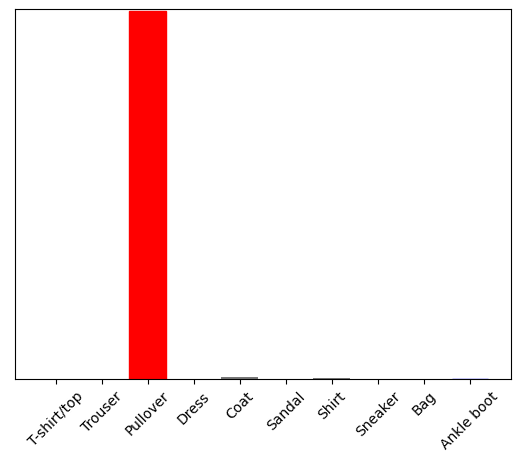

In [129]:
# plot_value_array 함수를 호출하여 단일 이미지의 예측값 배열을 바 차트로 표시합니다.
plot_value_array(0, predictions_single[0], test_labels)
# x축에 클래스 이름을 표시하고, 글자를 45도 회전시킵니다.
_ = plt.xticks(range(10), class_names, rotation=45)
# 그림을 화면에 표시합니다.
plt.show()

In [130]:
np.argmax(predictions_single[0])

2